In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import loadmat
from skimage import color
from skimage import io
from sklearn.model_selection import train_test_split
import cv2

%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 4.0)


In [2]:
def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

X_train, y_train = load_data('D:/College/Third Year Of College/Second Semster/Selected CS-2/project/archive//train_32x32.mat')
X_test, y_test = load_data('D:/College/Third Year Of College/Second Semster/Selected CS-2/project/archive//test_32x32.mat')

print("Training Set", X_train.shape, y_train.shape)
print("Test Set", X_test.shape, y_test.shape)

Training Set (32, 32, 3, 73257) (73257, 1)
Test Set (32, 32, 3, 26032) (26032, 1)


In [3]:
# Transpose the image arrays
X_train, y_train = X_train.transpose((3,0,1,2)), y_train[:,0]
X_test, y_test = X_test.transpose((3,0,1,2)), y_test[:,0]

print("Training Set", X_train.shape)
print("Test Set", X_test.shape)
print('')

# Calculate the total number of images
num_images = X_train.shape[0] + X_test.shape[0]

print("Total Number of Images", num_images)

Training Set (73257, 32, 32, 3)
Test Set (26032, 32, 32, 3)

Total Number of Images 99289


In [4]:
def plot_images(img, labels, nrows, ncols):
    """ Plot nrows x ncols images
    """
    fig, axes = plt.subplots(nrows, ncols)
    for i, ax in enumerate(axes.flat): 
        if img[i].shape == (32, 32, 3):
            ax.imshow(img[i])
        else:
            ax.imshow(img[i,:,:,0])
        ax.set_xticks([]); ax.set_yticks([])
        ax.set_title(labels[i])

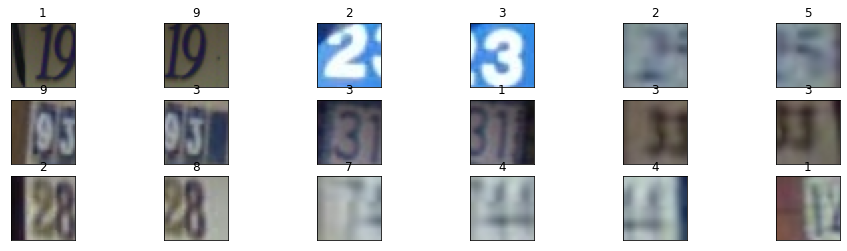

In [5]:
# Plot some training set images
plot_images(X_train, y_train, 3, 6)

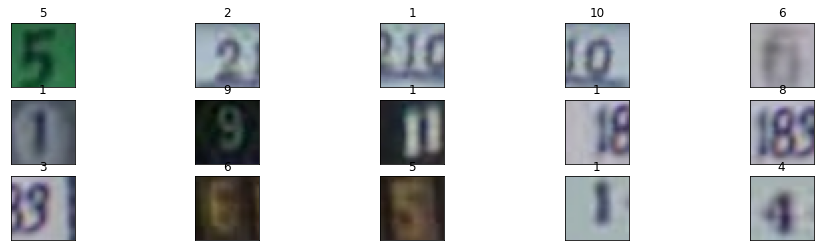

In [6]:
# Plot some test set images
plot_images(X_test, y_test, 3, 5)

In [7]:
print(np.unique(y_train))

[ 1  2  3  4  5  6  7  8  9 10]


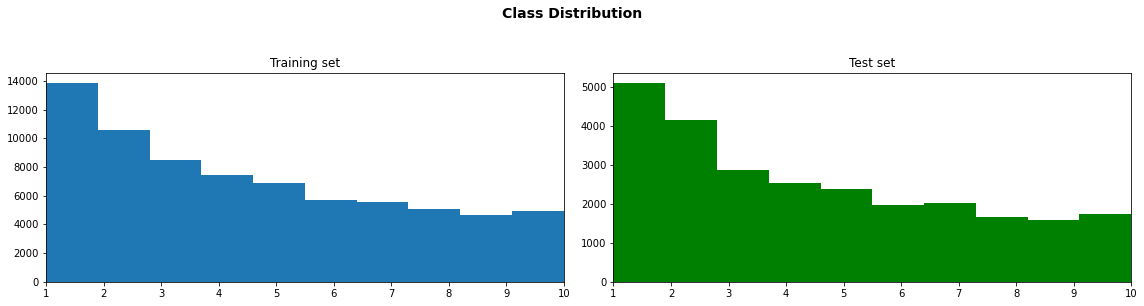

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_test, color='g', bins=10)
ax2.set_title("Test set")

fig.tight_layout()

In [9]:
y_train[y_train == 10] = 0
y_test[y_test == 10] = 0

In [10]:
print(np.unique(y_train))

[0 1 2 3 4 5 6 7 8 9]


In [11]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=43)

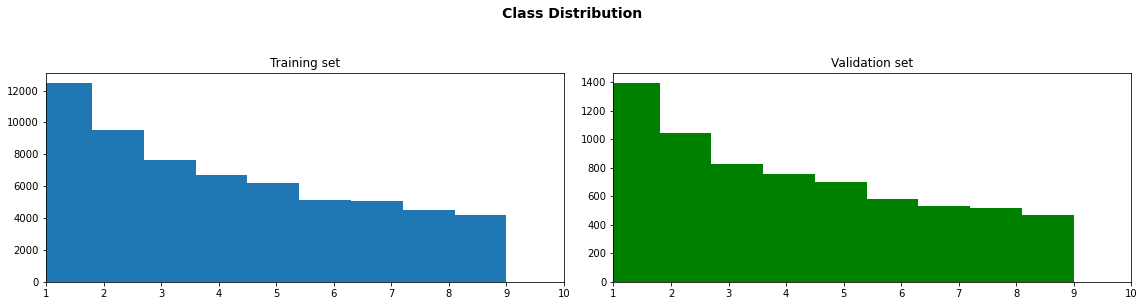

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)

fig.suptitle('Class Distribution', fontsize=14, fontweight='bold', y=1.05)

ax1.hist(y_train, bins=10)
ax1.set_title("Training set")
ax1.set_xlim(1, 10)

ax2.hist(y_val, color='g', bins=10)
ax2.set_title("Validation set")

fig.tight_layout()

In [13]:
y_train.shape, y_val.shape, y_test.shape

((65931,), (7326,), (26032,))

In [14]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)

In [15]:
train_greyscale = rgb2gray(X_train).astype(np.float32)
test_greyscale = rgb2gray(X_test).astype(np.float32)
val_greyscale = rgb2gray(X_val).astype(np.float32)

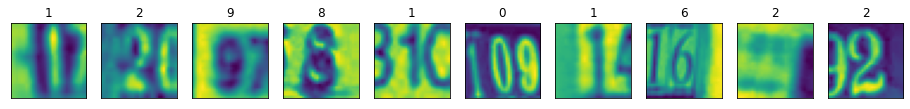

In [16]:
#del X_train, X_test, X_val
plot_images(train_greyscale, y_train, 1, 10)

In [17]:
train = np.ones([len(X_train),32, 128]) * 255
c=-1
newSize=(128,32)
for i in train_greyscale: 
    c=c+1
    img = cv2.resize(train_greyscale[c], (128,32))
    train[c,0:newSize[1], 0:newSize[0]] = img

In [18]:
test = np.ones([len(test_greyscale),32, 128]) * 255
c=-1
newSize=(128,32)
for i in test_greyscale: 
    c=c+1
    img = cv2.resize(test_greyscale[c], (128,32))
    test[c,0:newSize[1], 0:newSize[0]] = img

In [19]:
val = np.ones([len(val_greyscale),32, 128]) * 255
c=-1
newSize=(128,32)
for i in val_greyscale: 
    c=c+1
    img = cv2.resize(val_greyscale[c], (128,32))
    val[c,0:newSize[1], 0:newSize[0]] = img

C:\Users\DELL\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


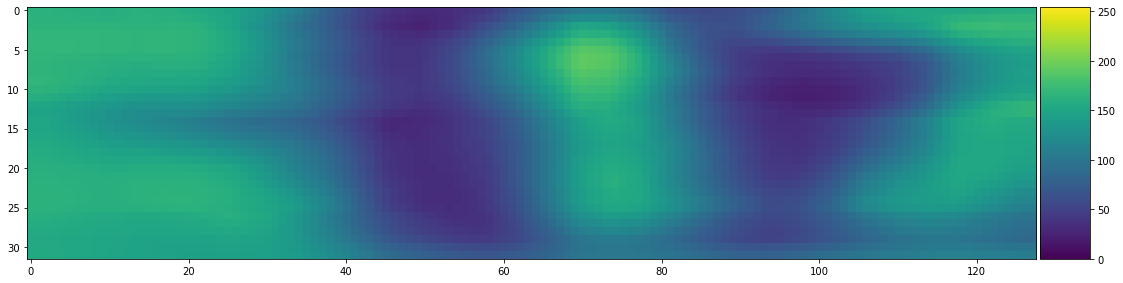

In [20]:
from skimage.io import imshow
imshow(train[0],vmin=0, vmax=255);

In [21]:
print("Training Set", train.shape)
print("Validation Set", val.shape)
print("Test Set", test.shape)

Training Set (65931, 32, 128)
Validation Set (7326, 32, 128)
Test Set (26032, 32, 128)


In [22]:
del X_train, X_test, X_val

In [23]:
transtrain = np.ones([len(train),128, 32])
c=-1
for i in train:
    c=c+1
    transtrain[c] = cv2.transpose(i)

In [24]:
transtest = np.ones([len(test),128, 32])
c=-1
for i in test:
    c=c+1
    transtest[c] = cv2.transpose(i)

In [25]:
transval = np.ones([len(val),128, 32])
c=-1
for i in val:
    c=c+1
    transval[c] = cv2.transpose(i)

In [26]:
# Calculate the mean on the training data
train_mean = np.mean(transtrain, axis=0)

# Calculate the std on the training data
train_std = np.std(transtrain, axis=0)

# Subtract it equally from all splits
train_greyscale_norm = (transtrain - train_mean) / train_std
test_greyscale_norm = (transtest - train_mean)  / train_std
val_greyscale_norm = (transval - train_mean) / train_std

In [27]:
train_greyscale_norm.shape

(65931, 128, 32)

In [28]:
test_greyscale_norm.shape

(26032, 128, 32)

In [29]:
from sklearn.preprocessing import OneHotEncoder
 
# Fit the OneHotEncoder
enc = OneHotEncoder().fit(y_train.reshape(-1, 1))

# Transform the label values to a one-hot-encoding scheme
y_train = enc.transform(y_train.reshape(-1, 1)).toarray()
y_test = enc.transform(y_test.reshape(-1, 1)).toarray()
y_val = enc.transform(y_val.reshape(-1, 1)).toarray()

print("Training set", y_train.shape)
print("Validation set", y_val.shape)
print("Test set", y_test.shape)

Training set (65931, 10)
Validation set (7326, 10)
Test set (26032, 10)


In [64]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,LSTM,Reshape,BatchNormalization


model=Sequential()

#model.add(Conv2D(32,kernel_size=3,strides=1,padding="same",activation="relu",input_shape=(32,32,1)))
conv1 =model.add(Conv2D(32, 3, strides=1, activation="ReLU", padding="same",input_shape=(128,32,1)))
#model.add(MaxPooling2D((2, 2), strides=2, name="pool1"))
#pool1 = inputs=conv1, pool_size=[2, 2], strides=2)
#model.add(MaxPooling2D(pool_size = 2, strides = 2, name="pool1"))
#model.add(BatchNormalization())

conv2=model.add(Conv2D(32, 3, strides=1, activation="ReLU", padding="same",input_shape=(32,32,1)))
#model.add(BatchNormalization())

model.add(MaxPooling2D((2, 2), name="pool1"))
model.add(Dropout(0.3))

#model.add(MaxPooling2D(pool_size = 2, strides = 2, name="pool1"))

conv3=model.add(Conv2D(64,kernel_size=3,strides=1,activation="ReLU",padding="same"))
model.add(BatchNormalization())


#model.add(MaxPooling2D((1, 2), name="pool3"))
#model.add(MaxPooling2D(pool_size = 2, strides = 2, name="pool1"))

conv4=model.add(Conv2D(64,kernel_size=3,strides=1,activation="ReLU",padding="same"))
#model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2), name="pool2"))
model.add(Dropout(0.3))
conv5=model.add(Conv2D(128,kernel_size=3,strides=1,activation="ReLU",padding="same"))
model.add(BatchNormalization())
#model.add(Dropout(0.2))
conv6=model.add(Conv2D(128,kernel_size=3,strides=1,activation="ReLU",padding="same"))
model.add(MaxPooling2D((2, 2), name="pool3"))
model.add(Dropout(0.3))


model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 32, 32)       320       
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 32, 32)       9248      
                                                                 
 pool1 (MaxPooling2D)        (None, 64, 16, 32)        0         
                                                                 
 dropout_10 (Dropout)        (None, 64, 16, 32)        0         
                                                                 
 conv2d_14 (Conv2D)          (None, 64, 16, 64)        18496     
                                                                 
 batch_normalization_5 (Batc  (None, 64, 16, 64)       256       
 hNormalization)                                                 
                                                      

In [65]:
#model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.Adam(1e-3),
             loss="categorical_crossentropy",
              metrics=["accuracy"])
history=model.fit(train_greyscale_norm,y_train,batch_size=256,epochs=10,validation_data=(val_greyscale_norm,y_val))

Epoch 1/10
258/258 [==============================] - 642s 2s/step - loss: 1.7447 - accuracy: 0.3817 - val_loss: 1.8800 - val_accuracy: 0.2740
Epoch 2/10
258/258 [==============================] - 758s 3s/step - loss: 0.6080 - accuracy: 0.8148 - val_loss: 0.4502 - val_accuracy: 0.8584
Epoch 3/10
258/258 [==============================] - 726s 3s/step - loss: 0.4340 - accuracy: 0.8712 - val_loss: 0.3604 - val_accuracy: 0.8946
Epoch 4/10
258/258 [==============================] - 634s 2s/step - loss: 0.3631 - accuracy: 0.8946 - val_loss: 0.3376 - val_accuracy: 0.9031
Epoch 5/10
258/258 [==============================] - 506s 2s/step - loss: 0.3280 - accuracy: 0.9047 - val_loss: 0.3095 - val_accuracy: 0.9111
Epoch 6/10
258/258 [==============================] - 440s 2s/step - loss: 0.2926 - accuracy: 0.9146 - val_loss: 0.2946 - val_accuracy: 0.9204
Epoch 7/10
258/258 [==============================] - 444s 2s/step - loss: 0.2702 - accuracy: 0.9220 - val_loss: 0.2867 - val_accuracy: 0.9210

In [66]:
train_loss , train_accuracy=model.evaluate(train_greyscale_norm,y_train)
print(train_accuracy)
print(train_loss)
loss , accuracy=model.evaluate(test_greyscale_norm,y_test)
print(accuracy)
print(loss)
y_pred = model.predict(test_greyscale_norm)

2061/2061 [==============================] - 123s 59ms/step - loss: 0.1665 - accuracy: 0.9531
0.953087329864502
0.16647294163703918
814/814 [==============================] - 70s 86ms/step - loss: 0.3049 - accuracy: 0.9163
0.9162953495979309
0.30486971139907837


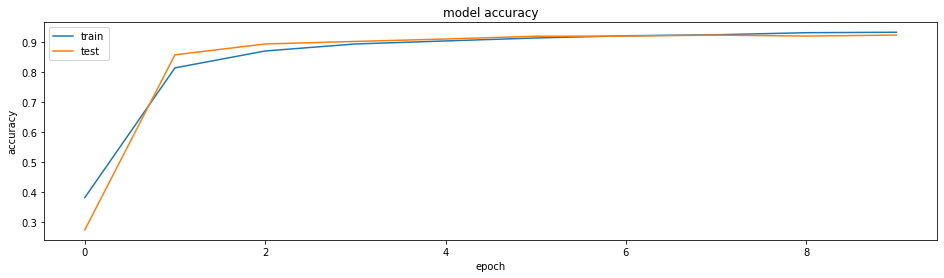

In [67]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


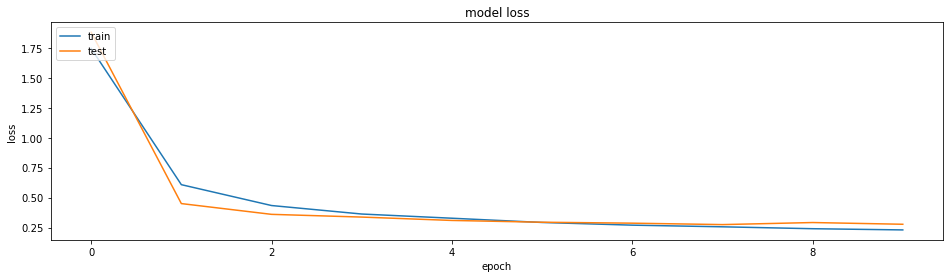

In [68]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [69]:
test.shape

(26032, 32, 128)

In [70]:
y_test.shape

(26032, 10)

In [71]:
from sklearn.metrics import confusion_matrix

# Set the figure size
plt.figure(figsize=(12, 8))
predictions = model.predict(test, steps=len(test), verbose=0)

# Calculate the confusion matrix
cm = confusion_matrix(y_true=np.argmax(y_test, axis=1),y_pred = np.argmax(predictions, axis=-1))

# Normalize the confusion matrix
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0

# Visualize the confusion matrix
sns.heatmap(cm, annot=True, cmap='Reds', fmt='.1f', square=True);

ValueError: in user code:

    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\DELL\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 128, 32, 1), found shape=(1, 32, 128)


<Figure size 864x576 with 0 Axes>

In [ ]:
flat_array= np.argmax(predictions, axis=-1)
# Find the incorrectly classified examples
incorrect = flat_array != np.argmax(y_test, axis=1)

# Select the incorrectly classified examples
images = test_greyscale[incorrect]
cls_true = y_test[incorrect]
cls_pred = flat_array[incorrect]

# Plot the mis-classified examples
plot_images(images, 3, 6, cls_true, cls_pred)